https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition

This dataset is a pre-processed and re-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection.

Epilepsy is classified into four main types in this revised classification: 
    1 focal; 
    2 generalized; 
    3 combined generalized and focal; 
    4 unknown. 

The group of combined generalized and focal epilepsy is a new terminology introduced in the type of epilepsy.Sep 20, 2020
Partial Seizure: Focal Seizure
Simple Partial: Focal Aware
Grand mal: Generalized tonic-clonic

In [1]:
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
epileptic = pd.read_csv("Epileptic Seizure Recognition.csv")
epileptic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [3]:
epileptic

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [4]:
epileptic.columns

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [5]:
epileptic.isnull().sum().sum()

0

Visualizing the Data 

<AxesSubplot:>

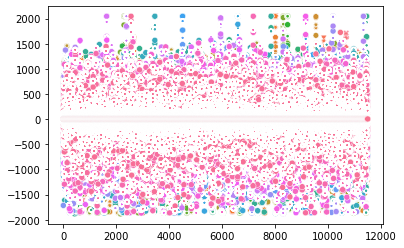

In [6]:
sns.scatterplot(data=epileptic, legend=False)

Correlation between various features


C:\Users\btama\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 864x720 with 0 Axes>

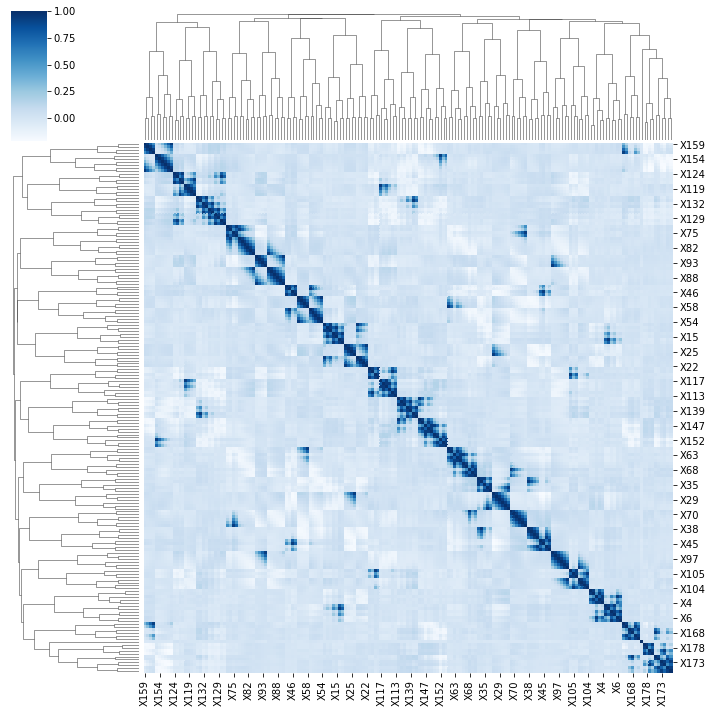

In [7]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.clustermap(epileptic.corr(),cmap ='Blues')

In [8]:
ep = epileptic.corr().abs()
s = ep.unstack()
corr_values = s.sort_values(kind="quicksort", ascending=False)

In [9]:
corr_df = pd.DataFrame(corr_values)

In [10]:
corr_df['x'] = corr_df.index.get_level_values(0)
corr_df['y'] = corr_df.index.get_level_values(1)
corr_df.reset_index(drop=True, inplace=True)

In [11]:
corr_df['correlation'] = corr_df[0]

In [12]:
corr_df = corr_df.drop(columns=0)

In [13]:
ns_corr = corr_df.loc[corr_df['correlation'] != 1]

In [14]:
ns_corr[:50]

,x,y,correlation
179,X14,X15,0.950880
180,X15,X14,0.950880
181,X15,X16,0.949805
182,X16,X15,0.949805
183,X116,X115,0.948074
184,X115,X116,0.948074
185,X1,X2,0.947729
186,X2,X1,0.947729
187,X8,X9,0.947479
188,X9,X8,0.947479
